In [1]:
from resources.helper.helper_dataset import get_dataloaders_mnist
from resources.helper.helper_evaluation import set_all_seeds, set_deterministic
from resources.helper.helper_train import train_model
from resources.helper.helper_plotting import plot_training_loss, plot_accuracy, show_examples

import torch
import numpy as np
import matplotlib.pyplot as plt

In [2]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cuda', index=0)

In [3]:
train_loader, valid_loader, test_loader = get_dataloaders_mnist(batch_size=256,validation_fraction=0.1)
for images, labels in train_loader:  
    print('Image batch d    imensions:', images.shape)
    print('Image label dimensions:', labels.shape)
    print('Class labels of 10 examples:', labels[:10])
    break

Image batch d    imensions: torch.Size([256, 1, 28, 28])
Image label dimensions: torch.Size([256])
Class labels of 10 examples: tensor([9, 5, 0, 1, 9, 1, 3, 6, 9, 5])


In [4]:
class MLP(torch.nn.Module):

    def __init__(self, num_features, num_classes, drop_proba, 
                 num_hidden_1, num_hidden_2):
        super().__init__()
        
        self.network = torch.nn.Sequential(
            torch.nn.Flatten(),
            torch.nn.Linear(num_features, num_hidden_1,bias=False),
            torch.nn.BatchNorm1d(num_hidden_1),
            torch.nn.ReLU(),
            torch.nn.Linear(num_hidden_1, num_hidden_2,bias=False),
            torch.nn.BatchNorm1d(num_hidden_2),
            torch.nn.ReLU(),
            torch.nn.Dropout(drop_proba),

            torch.nn.Linear(num_hidden_2, num_classes)
        )
           
    def forward(self, x):
        logits = self.network(x)
        return logits

Epoch: 001/005 | Batch 0000/0210 | Loss: 2.3992
Epoch: 001/005 | Batch 0050/0210 | Loss: 0.3939
Epoch: 001/005 | Batch 0100/0210 | Loss: 0.2964
Epoch: 001/005 | Batch 0150/0210 | Loss: 0.2220
Epoch: 001/005 | Batch 0200/0210 | Loss: 0.2504
Epoch: 001/005 | Train: 95.29% | Validation: 96.05%
Time elapsed: 0.28 min
Epoch: 002/005 | Batch 0000/0210 | Loss: 0.1867
Epoch: 002/005 | Batch 0050/0210 | Loss: 0.2088
Epoch: 002/005 | Batch 0100/0210 | Loss: 0.1751
Epoch: 002/005 | Batch 0150/0210 | Loss: 0.1827
Epoch: 002/005 | Batch 0200/0210 | Loss: 0.1135
Epoch: 002/005 | Train: 97.25% | Validation: 97.17%
Time elapsed: 0.57 min
Epoch: 003/005 | Batch 0000/0210 | Loss: 0.1182
Epoch: 003/005 | Batch 0050/0210 | Loss: 0.1248
Epoch: 003/005 | Batch 0100/0210 | Loss: 0.0947
Epoch: 003/005 | Batch 0150/0210 | Loss: 0.1025
Epoch: 003/005 | Batch 0200/0210 | Loss: 0.1355
Epoch: 003/005 | Train: 97.89% | Validation: 97.58%
Time elapsed: 0.86 min
Epoch: 004/005 | Batch 0000/0210 | Loss: 0.1080
Epoch: 

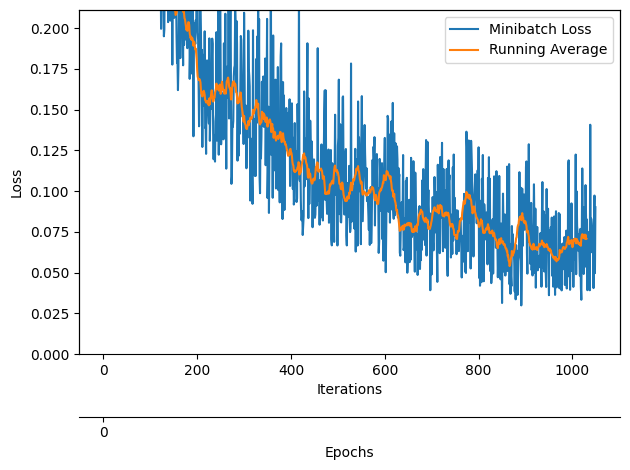

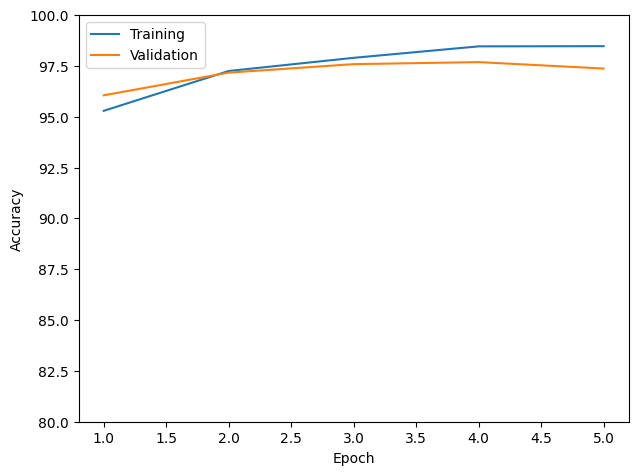

In [5]:
torch.manual_seed(42)
model = MLP(num_features=28*28,
                             num_hidden_1=70,
                             num_hidden_2=50,
                             drop_proba=0.0,
                             num_classes=10)
model = model.to(device)

optimizer = torch.optim.SGD(model.parameters(), lr=0.1)
Epochs=5
minibatch_loss_list, train_acc_list, valid_acc_list = train_model(
    model=model,
    num_epochs=Epochs,
    train_loader=train_loader,
    valid_loader=valid_loader,
    test_loader=test_loader,
    optimizer=optimizer,
    device=device)

plot_training_loss(minibatch_loss_list=minibatch_loss_list,
                   num_epochs=Epochs,
                   iter_per_epoch=len(train_loader),
                   results_dir=None,
                   averaging_iterations=20)

plt.show()

plot_accuracy(train_acc_list=train_acc_list,
              valid_acc_list=valid_acc_list,
              results_dir=None)

plt.ylim([80, 100])
plt.show()
